In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

shooter = pd.read_csv("Data/CleanedDataShooter.csv")
shooter.head()

,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Average,2600,3DS,...,PS4,PSP,PSV,SAT,SNES,Wii,WiiU,X,X360,XOne
0,1984,5,26.93,0.63,0.28,0.47,28.31,11.324,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,5,6.08,5.95,0.36,2.41,14.80,5.920,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2011,5,9.06,4.26,0.13,1.33,14.77,5.910,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2010,5,9.73,3.70,0.11,1.13,14.67,5.868,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2012,5,4.99,5.73,0.65,2.42,13.79,5.516,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
#calculate average sales for action genre from 1997 to 2011
data = {'Year': [],
        'Average Sales': []}
sales = pd.DataFrame(data)
year = 1997
for i in range(15):
    x = shooter[shooter['Year_of_Release'] == year]
    avg = x['Average'].mean()
    globalsales = x['Global_Sales'].mean()
    
    data = {'Year': year,
            'Average Sales': avg,
            'Global Sales': globalsales}
    sales = sales.append(data, ignore_index=True)
    year += 1

sales['Year'] = sales['Year'].astype(int) 
sales

,Year,Average Sales,Global Sales
0,1997,2.166000,5.413333
1,1998,1.068000,2.670000
2,1999,1.218000,3.045000
3,2000,NaN,NaN
4,2001,1.770000,4.423333
5,2002,1.662500,4.157500
6,2003,1.615000,4.035000
7,2004,1.998000,4.996667
8,2005,1.253000,3.130000
9,2006,1.578500,3.947500


In [31]:
#replace NaN values with average
gblAvg = sales['Global Sales'].mean()
Avg = sales['Average Sales'].mean()
sales['Global Sales'] = sales['Global Sales'].replace(np.nan, gblAvg)
sales['Average Sales'] = sales['Average Sales'].replace(np.nan, Avg)
sales.head()

,Year,Average Sales,Global Sales
0,1997,2.166000,5.413333
1,1998,1.068000,2.670000
2,1999,1.218000,3.045000
3,2000,2.010552,5.026153
4,2001,1.770000,4.423333


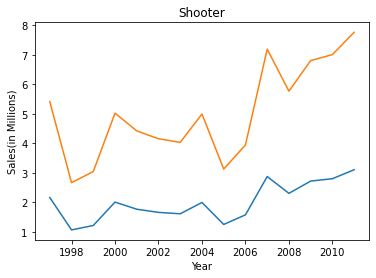

In [32]:
#sales plot
plt.plot(sales['Year'], sales['Average Sales'], sales['Year'], sales['Global Sales'])
plt.title('Shooter')
plt.xlabel('Year')
plt.ylabel('Sales(in Millions)')
plt.show()

In [2]:
#for SVR algorithm
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

y = shooter['Average'] #output
ygl = shooter['Global_Sales']
X = np.array(shooter['Year_of_Release']).reshape(-1,1) #input

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
Xgl_train, Xgl_test, ygl_train, ygl_test = train_test_split(X, y, test_size=0.2)

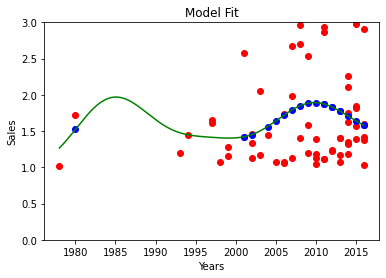

In [5]:
model = SVR(kernel='rbf', epsilon=0.20, gamma='scale')
modelgl = SVR(kernel='rbf')

model.fit(X_train, y_train)
modelgl.fit(Xgl_train, ygl_train)
prediction = model.predict(X_test)
predictiongl = modelgl.predict(Xgl_test)
# model.score(X_test, y_test)

# prediction

X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

# plt.scatter(X_test, prediction)
plt.ylim(top=3)
plt.title('Model Fit')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.scatter(X_train, y_train, color='red')
plt.plot(X_grid, model.predict(X_grid), color='green')
plt.scatter(X_test, prediction, color='blue')
plt.show()  #why you do dis???

In [7]:
#mean squared error (manual)
tot = 0
for x in range(20):
    y = (np.array(y_test)[x]-prediction[x])**2
    tot = tot + y
print(tot/20)

1.4489547423591005


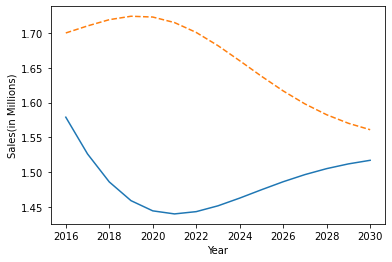

In [6]:
#make predictions
year = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]
data = {'Prediction_Year': [],
        'Predicted_Sales': [],
        'Global': []}
future_sales = pd.DataFrame(data)
future_sales['Prediction_Year'] = future_sales['Prediction_Year'].astype(int)

for i in range(15):
    x = model.predict([[year[i]]])
    xgl = modelgl.predict([[year[i]]])
    data = {'Prediction_Year': year[i],
            'Predicted_Sales': x,
            'Global': xgl}
    future_sales = future_sales.append(data, ignore_index=True)

plt.plot(future_sales['Prediction_Year'], future_sales['Predicted_Sales'])
plt.plot(future_sales['Prediction_Year'], future_sales['Global'], ls = '--')
plt.xlabel('Year')
plt.ylabel('Sales(in Millions)')
plt.show()


In [7]:
import joblib

filename = 'savedModels/shooter.joblib'
joblib.dump(model, filename)

['savedModels/shooter.joblib']

In [9]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import statistics

print(mean_squared_error(y_test, prediction))
test_rmse = sqrt(mean_squared_error(y_test, prediction))
print(test_rmse/statistics.mean(y_test))

1.4489547423591007
0.5574351023532405


In [10]:
print(test_rmse)

1.2037253600215876


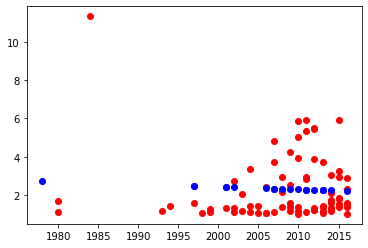

array([2.37691814])

In [11]:
#for XGBoost algorithm
# from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression

# xgb_classifier = XGBClassifier()
# xgb_classifier.fit(X_train, y_train)
# prediction_xgb = xgb_classifier.predict(X_test)

line = LinearRegression()
linegbl = LinearRegression()
line.fit(X_train, y_train)
linegbl.fit(Xgl_train, ygl_train)
prediction_lin = line.predict(X_test)


plt.scatter(X_train, y_train, color='red')
plt.scatter(X_test, prediction_lin, color='blue')
plt.show()
line.predict([[2005]])

In [12]:
rmse_lin = mean_squared_error(y_test, prediction_lin)
print(rmse_lin)

1.2550471601120323


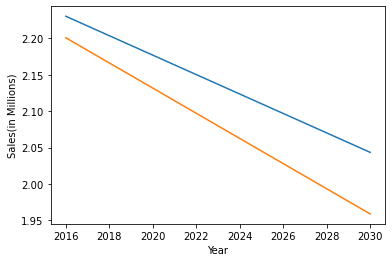

,Prediction_Year,Predicted_Sales,Global Sales
0,2016,[2.2301907566340553],[2.200684910748116]
1,2017,[2.2168519037354244],[2.183418570186973]
2,2018,[2.203513050836797],[2.166152229625837]
3,2019,[2.190174197938166],[2.148885889064694]
4,2020,[2.176835345039539],[2.131619548503558]
5,2021,[2.163496492140908],[2.1143532079424148]
6,2022,[2.150157639242277],[2.097086867381279]
7,2023,[2.1368187863436496],[2.0798205268201357]
8,2024,[2.1234799334450187],[2.0625541862589998]
9,2025,[2.1101410805463914],[2.0452878456978567]


In [13]:
year = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]
data = {'Prediction_Year': [],
        'Predicted_Sales': [],
        'Global Sales': []}
future_sales_lin = pd.DataFrame(data)
future_sales_lin['Prediction_Year'] = future_sales_lin['Prediction_Year'].astype(int)

for i in range(15):
    lin = line.predict([[year[i]]])
    lingbl = linegbl.predict([[year[i]]])
    data = {'Prediction_Year': year[i],
            'Predicted_Sales': lin,
            'Global Sales': lingbl}
    future_sales_lin = future_sales_lin.append(data, ignore_index=True)

plt.plot(future_sales_lin['Prediction_Year'], future_sales_lin['Predicted_Sales'], future_sales_lin['Prediction_Year'], future_sales_lin['Global Sales'])
plt.xlabel('Year')
plt.ylabel('Sales(in Millions)')
plt.show()
future_sales_lin

In [14]:
print(modelgl.predict([[2031]]))
print(linegbl.predict([[2056]]))

[1.6062753]
[1.51003129]


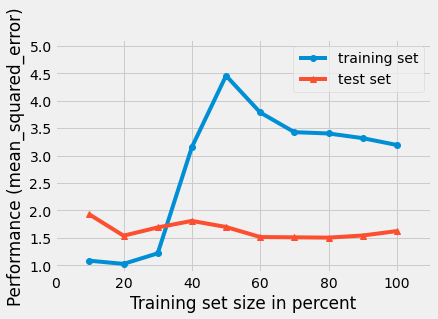

In [23]:
from mlxtend.plotting import plot_learning_curves

#change C and epsilon values
#over, under and best fit

clf = SVR(kernel='rbf')
# clf2 = LinearRegression()

plot_learning_curves(X_train, y_train, X_test, y_test, clf, scoring='mean_squared_error', print_model=False)
plt.show()